Here are some recommended packages, not all are required and depends on your solution.

In [63]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

## Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

Your analysis should answer the following questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


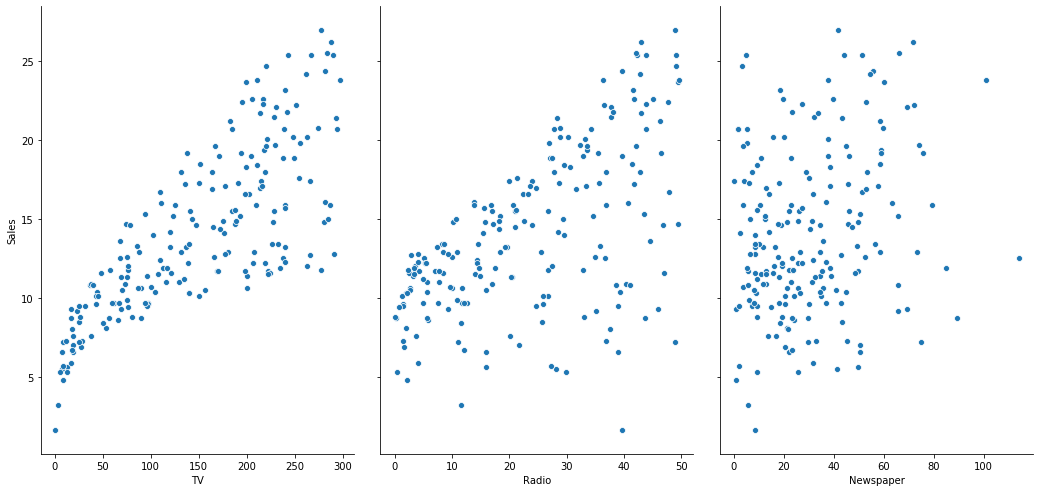

In [3]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [17]:
model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
model.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

In [14]:
model.conf_int

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x12e6fc190>>

Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

In [6]:
print(model.rsquared)

0.8972106381789522


In [7]:
print(model.pvalues)

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        21:19:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


From the summary above, the r suquare value is 0.896, which means the linear model has a good fit on the data. The p-value for TV and Radio is very small, which means the null hypothesis was rejected, while the p-value for newspaper is 0.86, wihch is larger than 0.05 so the null hypothesis was accepeted. 

## Aanlyze the Ames Housiong data 

### Questions
Is there a relationship between sale price and area?

How strong is that relationship?


In [20]:
Housing = pd.read_csv('Ameshousing.csv')

In [21]:
Housing.head(10)

,SalePrice,Bedrooms,LotArea,LivingArea,GarageArea,Neighborhood
0,270000,4,11792,2283,632,Gilbert
1,377500,3,14892,1746,758,Gilbert
2,337500,3,12456,1718,786,NridgHt
3,462000,4,14257,2772,754,NridgHt
4,489900,2,14803,2084,1220,NridgHt
5,555000,2,15431,2402,672,NridgHt
6,256300,3,14230,1600,890,NridgHt
7,335000,3,11308,2184,836,NridgHt
8,451950,3,13478,2296,842,NridgHt
9,610000,2,13693,2674,762,NridgHt


In [34]:
modelh = smf.ols(formula='SalePrice ~ LotArea + LivingArea + GarageArea', data=Housing).fit()
modelh.params

Intercept    -80815.822748
LotArea           4.227893
LivingArea      104.168528
GarageArea      177.976355
dtype: float64

In [35]:
modelh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     137.1
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           1.76e-44
Time:                        00:17:02   Log-Likelihood:                -2045.6
No. Observations:                 168   AIC:                             4099.
Df Residuals:                     164   BIC:                             4112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.082e+04   1.67e+04     -4.837      0.000   -1.14e+05   -4.78e+04
LotArea        4.2279      1.397      3.026      0.003       1.469       6.986
LivingArea   104.1685     11.011      9.460      0.000      82.426     125.911
GarageArea   177.9764     24.340      7.312      0.000     129.916     226.037
==============================================================================
Omnibus:                       85.539   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.150
Skew:                           1.849   Prob(JB):                     2.41e-99
Kurtosis:                      10.156   Cond. No.                     4.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

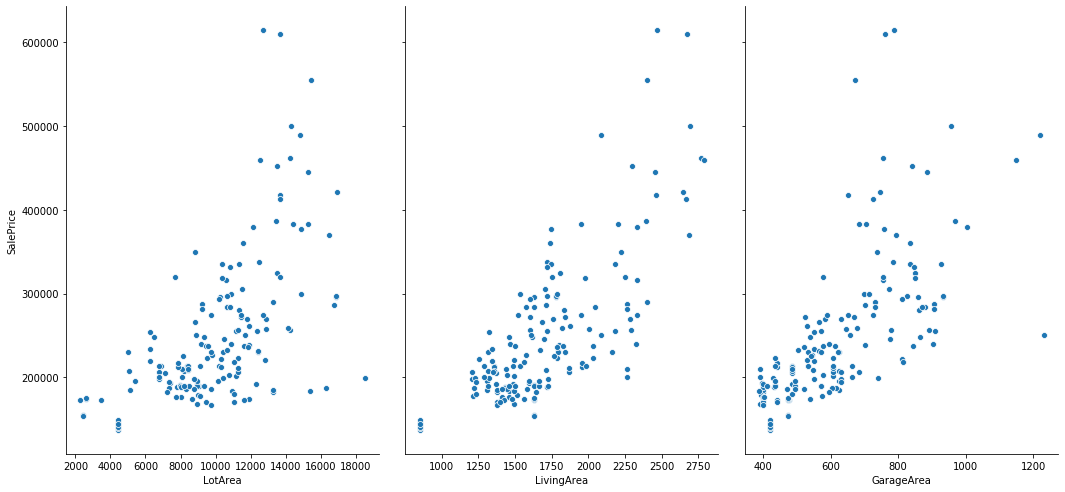

In [33]:
sns.pairplot(Housing, x_vars=['LotArea' , 'LivingArea' , 'GarageArea'], y_vars='SalePrice', height=7, aspect=0.7)

In [79]:
lot = np.linspace(1000, 20000)
lot1 = np.linspace(200, 3000)
lot2 = np.linspace(100, 1400)
xpredict = pd.DataFrame({'LotArea': lot,'LivingArea': lot1, 'GarageArea':lot2})


In [80]:
ylot = modelh.predict(xpredict)

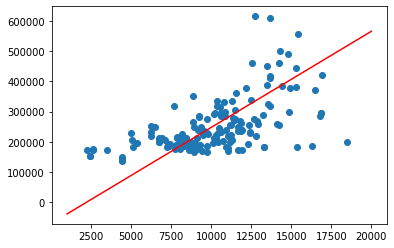

In [81]:
plt.scatter(Housing['LotArea'], Housing['SalePrice'])
plt.plot(lot, ylot, color = 'red')

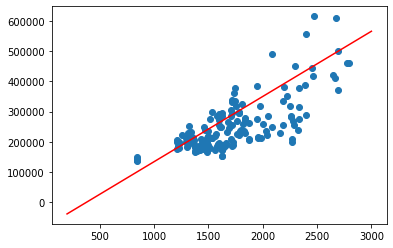

In [82]:
plt.scatter(Housing['LivingArea'], Housing['SalePrice'])
plt.plot(lot1, ylot, color = 'red')

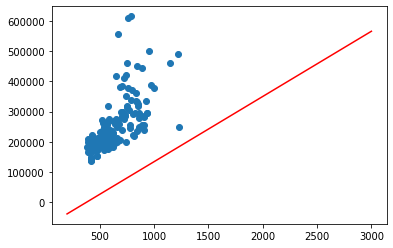

In [83]:
plt.scatter(Housing['GarageArea'], Housing['SalePrice'])
plt.plot(lot1, ylot, color = 'red')

### Conclusion

From the linear regression model summary. The r suqare value for this model is 0.715, which means the model was a good fit to the data. The Lot area, Living area and Garage area have a positive relation with the sale price. The p-value for all three variable is very small, so the null hypothesis was rejected. Fromt the prediction data and graph, the model have a better fit on Lot area and Living area.